# Node identifier: Machine Learning approach

## Preparation

In [1]:
# Set path
import pickle
# path = 'C:/Users/User/Desktop/Assignatures/Synthesis project/GraphAnomaly/dades_arnau/'
path = 'C:/Users/Usuario/Desktop/UAB/Tercer/2n cuatri/Synthesis project/GraphAnomaly/elliptic_bitcoin_dataset/'

In [2]:
# Load train and test set
with open(path + 'sub_train_bal.pkl', 'rb') as f:
    sub_train = pickle.load(f)
with open(path + 'sub_test_bal.pkl', 'rb') as f:
    sub_test = pickle.load(f)
with open(path + 'sequential_test.pkl', 'rb') as f:
    test_set = pickle.load(f)

In [3]:
from Helper import separate_labels

# Split labels
X_train, y_train, X_test, y_test = separate_labels(sub_train, sub_test)

## Models

In [26]:
import matplotlib.pyplot as plt  
from sklearn.metrics import *

# Function to display the performance of the Machine Learning classifiers
def plot(name, y_test, y_pred, save_results = False, df_results=None, CM=True):    
    # Except for the accuracy, the others compute the metric for the ilicit class
    print(f"Testing {name}...")
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    precision = round(precision_score(y_test, y_pred, pos_label=0), 4)
    print("Precision: {:.2f}%".format(precision * 100))
    recall = round(recall_score(y_test, y_pred, pos_label=0), 4)
    print("Recall: {:.2f}%".format(recall * 100))
    f1 = round(f1_score(y_test, y_pred, pos_label=0),4)
    print("F1 Score: {:.2f}%\n".format(f1 * 100))
    
    if save_results:
        if "DecisionTree" in str(name):
            df_results.loc[len(df_results)] = ["Decision Tree", accuracy, precision, recall, f1]
        
        elif "RandomForest" in str(name):
            df_results.loc[len(df_results)] = ["Random Forest", accuracy, precision, recall, f1]
            
        elif "GradientBoosting" in str(name):
            df_results.loc[len(df_results)] = ["Gradient Boosting", accuracy, precision, recall, f1]
        
        elif "ExtraTrees" in str(name):
            df_results.loc[len(df_results)] = ["Extra Trees", accuracy, precision, recall, f1]
        
        else:
            df_results.loc[len(df_results)] = ["Multi-Layer Perceptron (MLP)", accuracy, precision, recall, f1]

    # Confusion matrix
    if CM:
        cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ilicit', 'Licit'])
        disp.plot()
        plt.title(name)
        plt.show()
        
    return df_results

In [17]:
# Function to train multiple models
def train(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        plot(model, y_test, y_pred)

Testing DecisionTreeClassifier()...
Accuracy: 97.18%
Precision: 93.52%
Recall: 94.20%
F1 Score: 93.86%



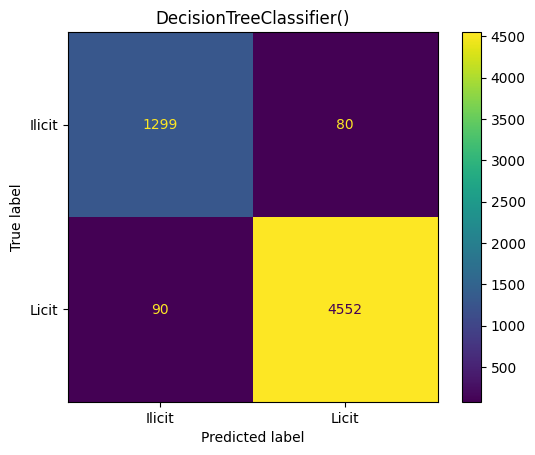

Testing RandomForestClassifier()...
Accuracy: 98.52%
Precision: 99.69%
Recall: 93.84%
F1 Score: 96.68%



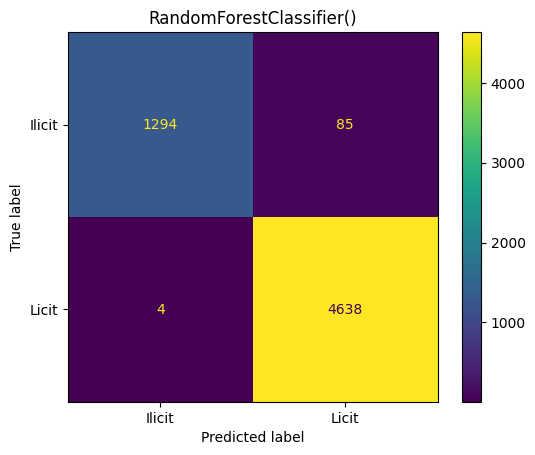

Testing GradientBoostingClassifier()...
Accuracy: 98.44%
Precision: 99.01%
Recall: 94.13%
F1 Score: 96.51%



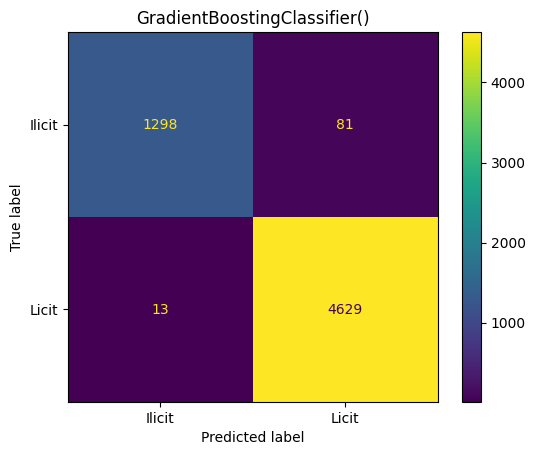

Testing ExtraTreesClassifier()...
Accuracy: 98.47%
Precision: 99.61%
Recall: 93.69%
F1 Score: 96.56%



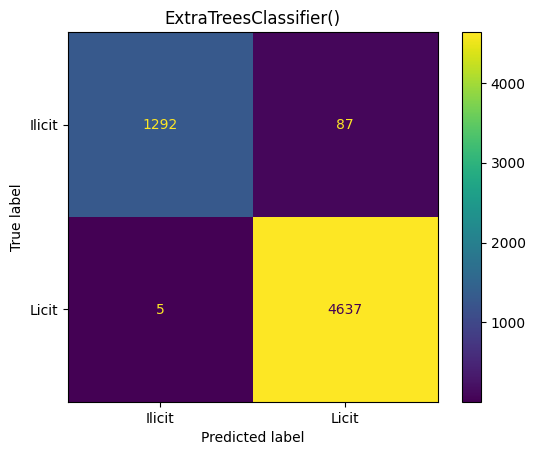

Testing MLPClassifier()...
Accuracy: 77.10%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%



c:\Users\Usuario\Desktop\UAB\Tercer\2n cuatri\Synthesis project\GraphAnomaly\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


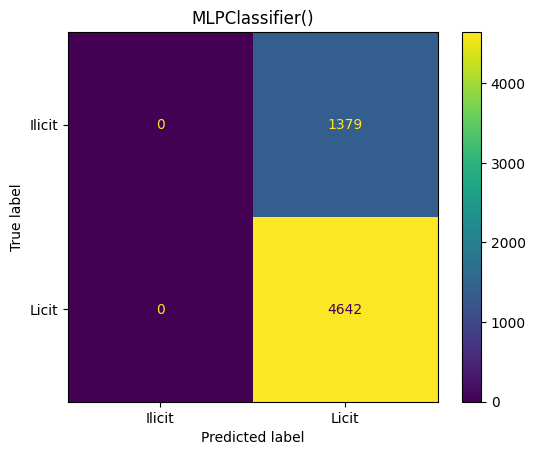

In [18]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import *
from sklearn.neural_network import MLPClassifier

models = [DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), MLPClassifier()]
train(models, X_train, y_train, X_test, y_test)

Testing DecisionTreeClassifier(random_state=69)...
Accuracy: 97.34%
Precision: 94.01%
Recall: 94.42%
F1 Score: 94.21%



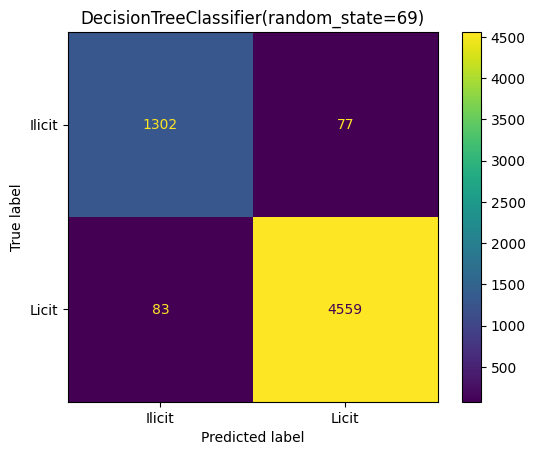

Testing RandomForestClassifier(random_state=69)...
Accuracy: 98.42%
Precision: 99.69%
Recall: 93.40%
F1 Score: 96.44%



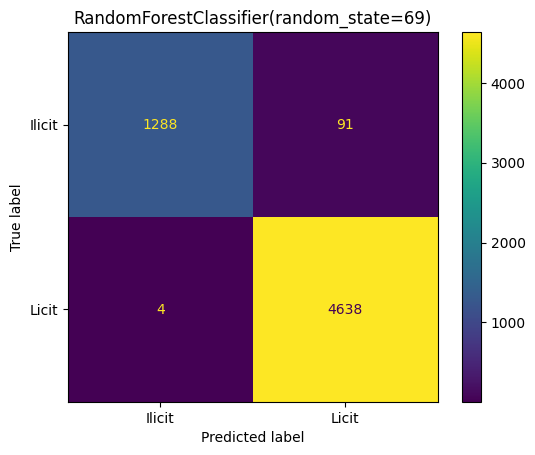

Testing GradientBoostingClassifier(random_state=69)...
Accuracy: 98.44%
Precision: 99.01%
Recall: 94.13%
F1 Score: 96.51%



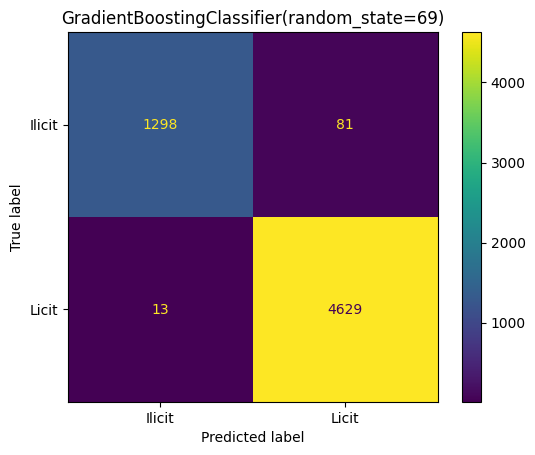

Testing ExtraTreesClassifier(random_state=69)...
Accuracy: 98.39%
Precision: 99.69%
Recall: 93.26%
F1 Score: 96.37%



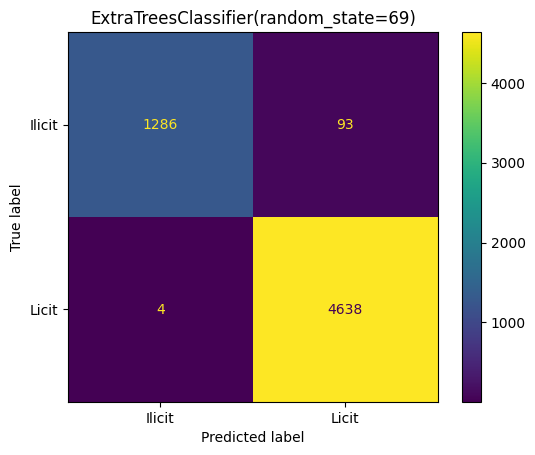

Testing MLPClassifier(random_state=69)...
Accuracy: 77.10%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%



c:\Users\Usuario\Desktop\UAB\Tercer\2n cuatri\Synthesis project\GraphAnomaly\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


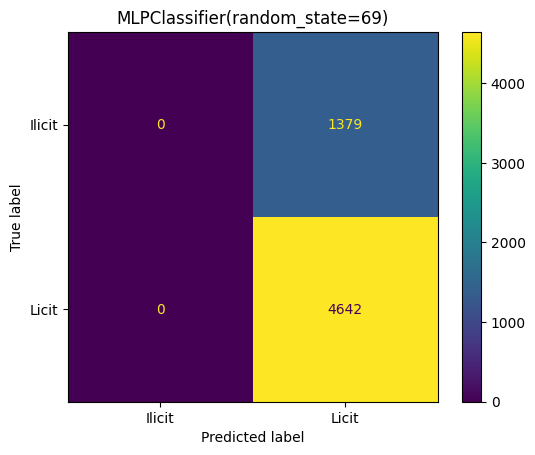

In [20]:
# Select random forest as one of the best performing models
# Train
from sklearn.ensemble import *

models = [DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), MLPClassifier()]

decision_tree = DecisionTreeClassifier(random_state=69)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
plot(decision_tree, y_test, y_pred)


random_forest = RandomForestClassifier(random_state=69)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
plot(random_forest, y_test, y_pred)


grad_boost = GradientBoostingClassifier(random_state=69)
grad_boost.fit(X_train, y_train)
y_pred = grad_boost.predict(X_test)
plot(grad_boost, y_test, y_pred)


extra_trees = ExtraTreesClassifier(random_state=69)
extra_trees.fit(X_train, y_train)
y_pred = extra_trees.predict(X_test)
plot(extra_trees, y_test, y_pred)


MLP_model = MLPClassifier(random_state=69)
MLP_model.fit(X_train, y_train)
y_pred = MLP_model.predict(X_test)
plot(MLP_model, y_test, y_pred)

In [21]:
def split_test(test):
    test = test.loc[test['class'].isin([0, 1])] # Drop unknown
    y_test = list(test['class'])
    X_test = test.drop(columns=['class'])
    return X_test, y_test

In [29]:
import pandas as pd
results = pd.DataFrame(columns=["Classifier", "Accuracy", "Precision", "Recall", "F1 score"])

true_X_test, true_y_test = split_test(test_set)
true_y_pred = decision_tree.predict(true_X_test)
results = plot(decision_tree, true_y_test, true_y_pred, save_results=True, df_results=results, CM=False)

true_X_test, true_y_test = split_test(test_set)
true_y_pred = random_forest.predict(true_X_test)
results = plot(random_forest, true_y_test, true_y_pred, save_results=True, df_results=results, CM=False)

true_X_test, true_y_test = split_test(test_set)
true_y_pred = grad_boost.predict(true_X_test)
results = plot(grad_boost, true_y_test, true_y_pred, save_results=True, df_results=results, CM=False)

true_X_test, true_y_test = split_test(test_set)
true_y_pred = extra_trees.predict(true_X_test)
results = plot(extra_trees, true_y_test, true_y_pred, save_results=True, df_results=results, CM=False)

true_X_test, true_y_test = split_test(test_set)
true_y_pred = MLP_model.predict(true_X_test)
results = plot(MLP_model, true_y_test, true_y_pred, save_results=True, df_results=results, CM=False)

Testing DecisionTreeClassifier(random_state=69)...
Accuracy: 90.77%
Precision: 38.11%
Recall: 67.50%
F1 Score: 48.72%

Testing RandomForestClassifier(random_state=69)...
Accuracy: 97.83%
Precision: 93.49%
Recall: 71.65%
F1 Score: 81.13%

Testing GradientBoostingClassifier(random_state=69)...
Accuracy: 96.86%
Precision: 77.83%
Recall: 72.30%
F1 Score: 74.96%

Testing ExtraTreesClassifier(random_state=69)...
Accuracy: 97.77%
Precision: 95.52%
Recall: 68.88%
F1 Score: 80.04%

Testing MLPClassifier(random_state=69)...
Accuracy: 93.47%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%



In [36]:
results.to_csv('results.csv', index=False)

In [34]:
from tabulate import tabulate

print(tabulate(results, headers='keys', tablefmt='rst'))

====  ============================  ==========  ===========  ========  ==========
  ..  Classifier                      Accuracy    Precision    Recall    F1 score
====  ============================  ==========  ===========  ========  ==========
   0  Decision Tree                     0.9077       0.3811    0.675       0.4872
   1  Random Forest                     0.9783       0.9349    0.7165      0.8113
   2  Gradient Boosting                 0.9686       0.7783    0.723       0.7496
   3  Extra Trees                       0.9777       0.9552    0.6888      0.8004
   4  Multi-Layer Perceptron (MLP)      0.9347       0         0           0
====  ============================  ==========  ===========  ========  ==========


In [38]:
results

,Classifier,Accuracy,Precision,Recall,F1 score
0,Decision Tree,0.9077,0.3811,0.6750,0.4872
1,Random Forest,0.9783,0.9349,0.7165,0.8113
2,Gradient Boosting,0.9686,0.7783,0.7230,0.7496
3,Extra Trees,0.9777,0.9552,0.6888,0.8004
4,Multi-Layer Perceptron (MLP),0.9347,0.0000,0.0000,0.0000


## Save predictions

In [59]:
# Function to predict a whole dataset using an already trained model
def predict(df, model):
    temp = df.drop(columns=['class'])
    temp = model.predict(temp)  
    df.insert(loc=2, column='prediction', value=temp)    
    return df

In [67]:
# Predict the values of the test set using the random forest 
test_predicted = predict(test_set, rt)

In [68]:
# Now we would only need to save this new dataset
test_predicted

,node,class,prediction,time step,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,...,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
0,56772759,2,1,35,-0.161125,-0.105718,-0.091383,-0.121970,-0.043875,-0.113002,...,1.321029,0.988475,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
1,67603032,2,1,35,-0.161043,-0.060878,1.018602,-0.121970,-0.043875,-0.113002,...,-0.210925,-0.304549,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,54750809,2,1,35,-0.145169,-0.088945,0.463609,-0.121970,-0.043875,-0.113002,...,-0.412695,-0.449620,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
3,67841095,2,1,35,-0.172858,-0.108048,-0.091383,-0.121970,-0.043875,-0.113002,...,1.193989,0.881249,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399
4,70042737,0,0,35,-0.171439,-0.130081,1.018602,-0.121970,-0.043875,-0.113002,...,-0.128722,-0.235168,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67499,158579784,2,1,49,-0.167104,-0.124868,1.018602,-0.121970,-0.043875,-0.113002,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
67500,188612333,2,0,49,-0.172910,-0.081127,-1.201369,-0.121970,-0.063725,-0.113002,...,-0.577099,1.707523,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
67501,41402314,1,1,49,-0.129660,1.247693,1.573595,2.729456,0.214176,2.989901,...,1.356804,1.045663,0.780139,0.575016,-0.098889,0.412346,0.327506,0.109229,-0.725131,-0.420181
67502,158591722,2,1,49,-0.172852,-0.079761,1.018602,-0.046932,-0.043875,-0.029140,...,-0.569626,-0.607306,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
